In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
from sklearn.preprocessing import StandardScaler
import os
from matplotlib import pyplot as plt

In [120]:
file_path = ['pbp/1-1/R','pbp/1-2/R','pbp/1-3/R','pbp/1-4/R']

In [157]:
file_orient = ['orient/0','orient/45','orient/90','orient/135','orient/180','orient/225','orient/270','orient/315']

In [109]:
x_train1=loadmat( file_path [ 0 ] + '/group.mat' ) [ 'groups' ]
x_train2=loadmat( file_path [ 1 ] + '/group.mat' ) [ 'groups' ]
x_train3=loadmat( file_path [ 2 ] + '/group.mat' ) [ 'groups' ]
y_train1=loadmat(  '1collagen_y_.mat' ) [ 'y_' ]
y_train2=loadmat(  '2collagen_y_.mat' ) [ 'y_' ]
y_train3=loadmat(  '3collagen_y_.mat' ) [ 'y_' ]

x_train=np.append(x_train1,x_train2,axis=0)
x_train=np.append(x_train,x_train3,axis=0)
y_train=np.append(y_train1,y_train2,axis=1)
y_train=np.append(y_train,y_train3,axis=1).reshape(3072,1)

In [224]:
pbps = loadmat( file_path [ 3 ] + '/pbps.mat' ) [ 'pbps' ]
x_valid=pbps.reshape(pbps.shape[0]*pbps.shape[1],19)
x_valid.shape

(4226331, 19)

In [111]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

In [217]:
ss=StandardScaler()
x_valid=ss.fit_transform(x_valid)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(2,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2())
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['sparse_categorical_accuracy'])


history=model.fit(x_train,y_train,batch_size=128,epochs=1000,validation_split=0.2,validation_freq=1)
model.summary()

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplots( figsize = ( 15, 10 ) )
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.subplots( figsize = ( 15, 10 ) )
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [218]:
x_predict=model.predict(x_valid)
x_predict.shape

132073/132073 [==============================] - 102s 771us/step


(4226331, 2)

In [219]:
a=x_predict[:,1]

In [220]:
label=loadmat( file_path [ 3 ] + '/label.mat' ) [ 'label' ]

In [221]:
result = np.zeros( label.shape )
for i in range(1024):
    result [label==i] = a[i]

In [222]:
np.histogram(result)

(array([2077595,  265957,   84490,  141717,  108313,   89699,  101552,
         145242,   93287, 1118479], dtype=int64),
 array([0.00150436, 0.09128279, 0.18106122, 0.27083965, 0.36061808,
        0.45039651, 0.54017494, 0.62995337, 0.7197318 , 0.80951022,
        0.89928865]))

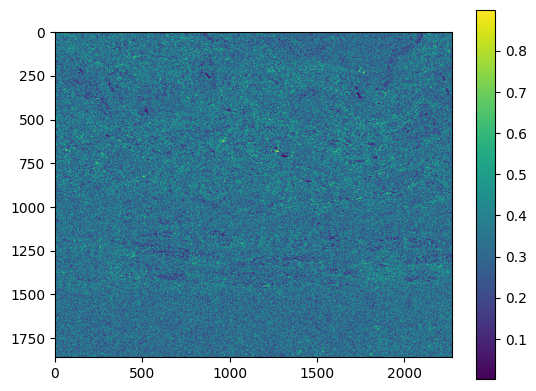

In [223]:
plt.imshow(result)
plt.colorbar()
#plt.savefig('predict.jpg',dpi=1000,bbox_inches='tight')

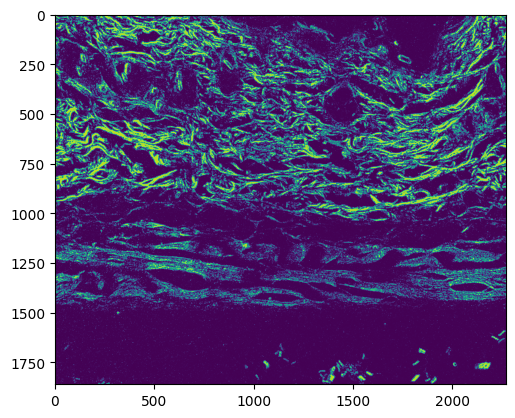

In [227]:
a=a.reshape(pbps.shape[0],pbps.shape[1])
plt.imshow(a)
plt.savefig('pixel.jpg',dpi=1000,bbox_inches='tight')